In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
import textwrap
from pyfonts import load_font, load_exact_font

df = pd.read_csv('rolling_stone.csv')
replacements = {
   "Blues/Blues ROck": "Blues/Blues Rock",
   "Rock n' Roll/Rhythm & Blues": "Blues/Blues Rock"
}
df['genre_clean'] = df['genre'].replace(replacements)
df.drop(['spotify_url', 'sort_name', 'artist_birth_year_sum', 'genre'], axis=1, inplace=True)
df.dropna(subset=['differential'], inplace=True)
df = df[df['release_year']<=2003]
print(df.columns)
df.sample(5)

Index(['clean_name', 'album', 'rank_2003', 'rank_2012', 'rank_2020',
       'differential', 'release_year', 'type', 'weeks_on_billboard',
       'peak_billboard_position', 'spotify_popularity', 'artist_member_count',
       'artist_gender', 'debut_album_release_year', 'ave_age_at_top_500',
       'years_between', 'album_id', 'genre_clean'],
      dtype='object')


,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_gender,debut_album_release_year,ave_age_at_top_500,years_between,album_id,genre_clean
25,Aretha Franklin,Amazing Grace,NaN,NaN,154.0,347,1972,Live,23.0,7,38.0,1.0,Female,1961.0,30.00,11.0,5pIUimaQ6XePPXbMUi3te0,Soul/Gospel/R&B
653,Patsy Cline,The Ultimate Collection,234.0,235.0,229.0,5,2000,Greatest Hits,NaN,201,NaN,1.0,Female,1957.0,68.00,43.0,NOS010,Country/Folk/Country Rock/Folk Rock
118,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,1.0,1.0,24.0,-23,1967,Studio,233.0,1,71.0,4.0,Male,1963.0,25.75,4.0,6QaVfG1pHYl1z15ZxkvVDW,NaN
378,Eagles,Hotel California,37.0,37.0,118.0,-81,1976,Studio,158.0,1,76.0,5.0,Male,1972.0,29.00,4.0,2widuo17g5CEC66IbzveRu,Country/Folk/Country Rock/Folk Rock
664,Muddy Waters,The Anthology,38.0,38.0,483.0,-445,2001,Compilation,NaN,201,NaN,1.0,Male,1947.0,88.00,54.0,NOS122,Blues/Blues Rock


In [2]:
data = df.groupby('genre_clean')['differential'].mean().sort_values()
data = pd.DataFrame({
   'genre': data.index,
   'diff': data.values
})
data = data[~data['genre'].isin(['Afrobeat'])]
data.sort_values('diff', ascending=False, inplace=True)
data

,genre,diff
13,Hip-Hop/Rap,156.955556
12,Electronic,83.222222
10,Indie/Alternative Rock,59.478261
9,Soul/Gospel/R&B,13.000000
8,Punk/Post-Punk/New Wave/Power Pop,-13.925926
7,Country/Folk/Country Rock/Folk Rock,-16.954545
6,Funk/Disco,-24.363636
5,Big Band/Jazz,-38.428571
4,Hard Rock/Metal,-45.629630
3,Reggae,-63.285714


In [3]:
def draw_arrow(
   fig, tail_position, head_position,
   color='black', lw=1, radius=0.1, tail_width=0.01,
   head_width=5, head_length=5, invert=False,
   **kwargs
):
   arrow_style = f"Simple, tail_width={tail_width}, head_width={head_width}, head_length={head_length}"
   connection_style = f"arc3,rad={'-' if invert else ''}{radius}"
   arrow_patch = FancyArrowPatch(
      tail_position,
      head_position,
      connectionstyle=connection_style,
      transform=fig.transFigure,
      arrowstyle=arrow_style,
      color=color,
      lw=lw,
      **kwargs,
   )
   fig.patches.append(arrow_patch)

path_bg = 'background.png'
image_bg = np.array(Image.open(path_bg))

# open img of rap albums
top_rap_album1 = 'AqueminiOutKast.jpg'
image_rap1 = np.array(Image.open(top_rap_album1))
top_rap_album2 = 'nas-illmatic.jpg'
image_rap2 = np.array(Image.open(top_rap_album2))
top_rap_album3 = 'jay-z-the-blueprint.jpg'
image_rap3 = np.array(Image.open(top_rap_album3))
top_rap_album4 = 'Missy_Elliott_Supa_Dupa_Fly.jpg'
image_rap4 = np.array(Image.open(top_rap_album4))

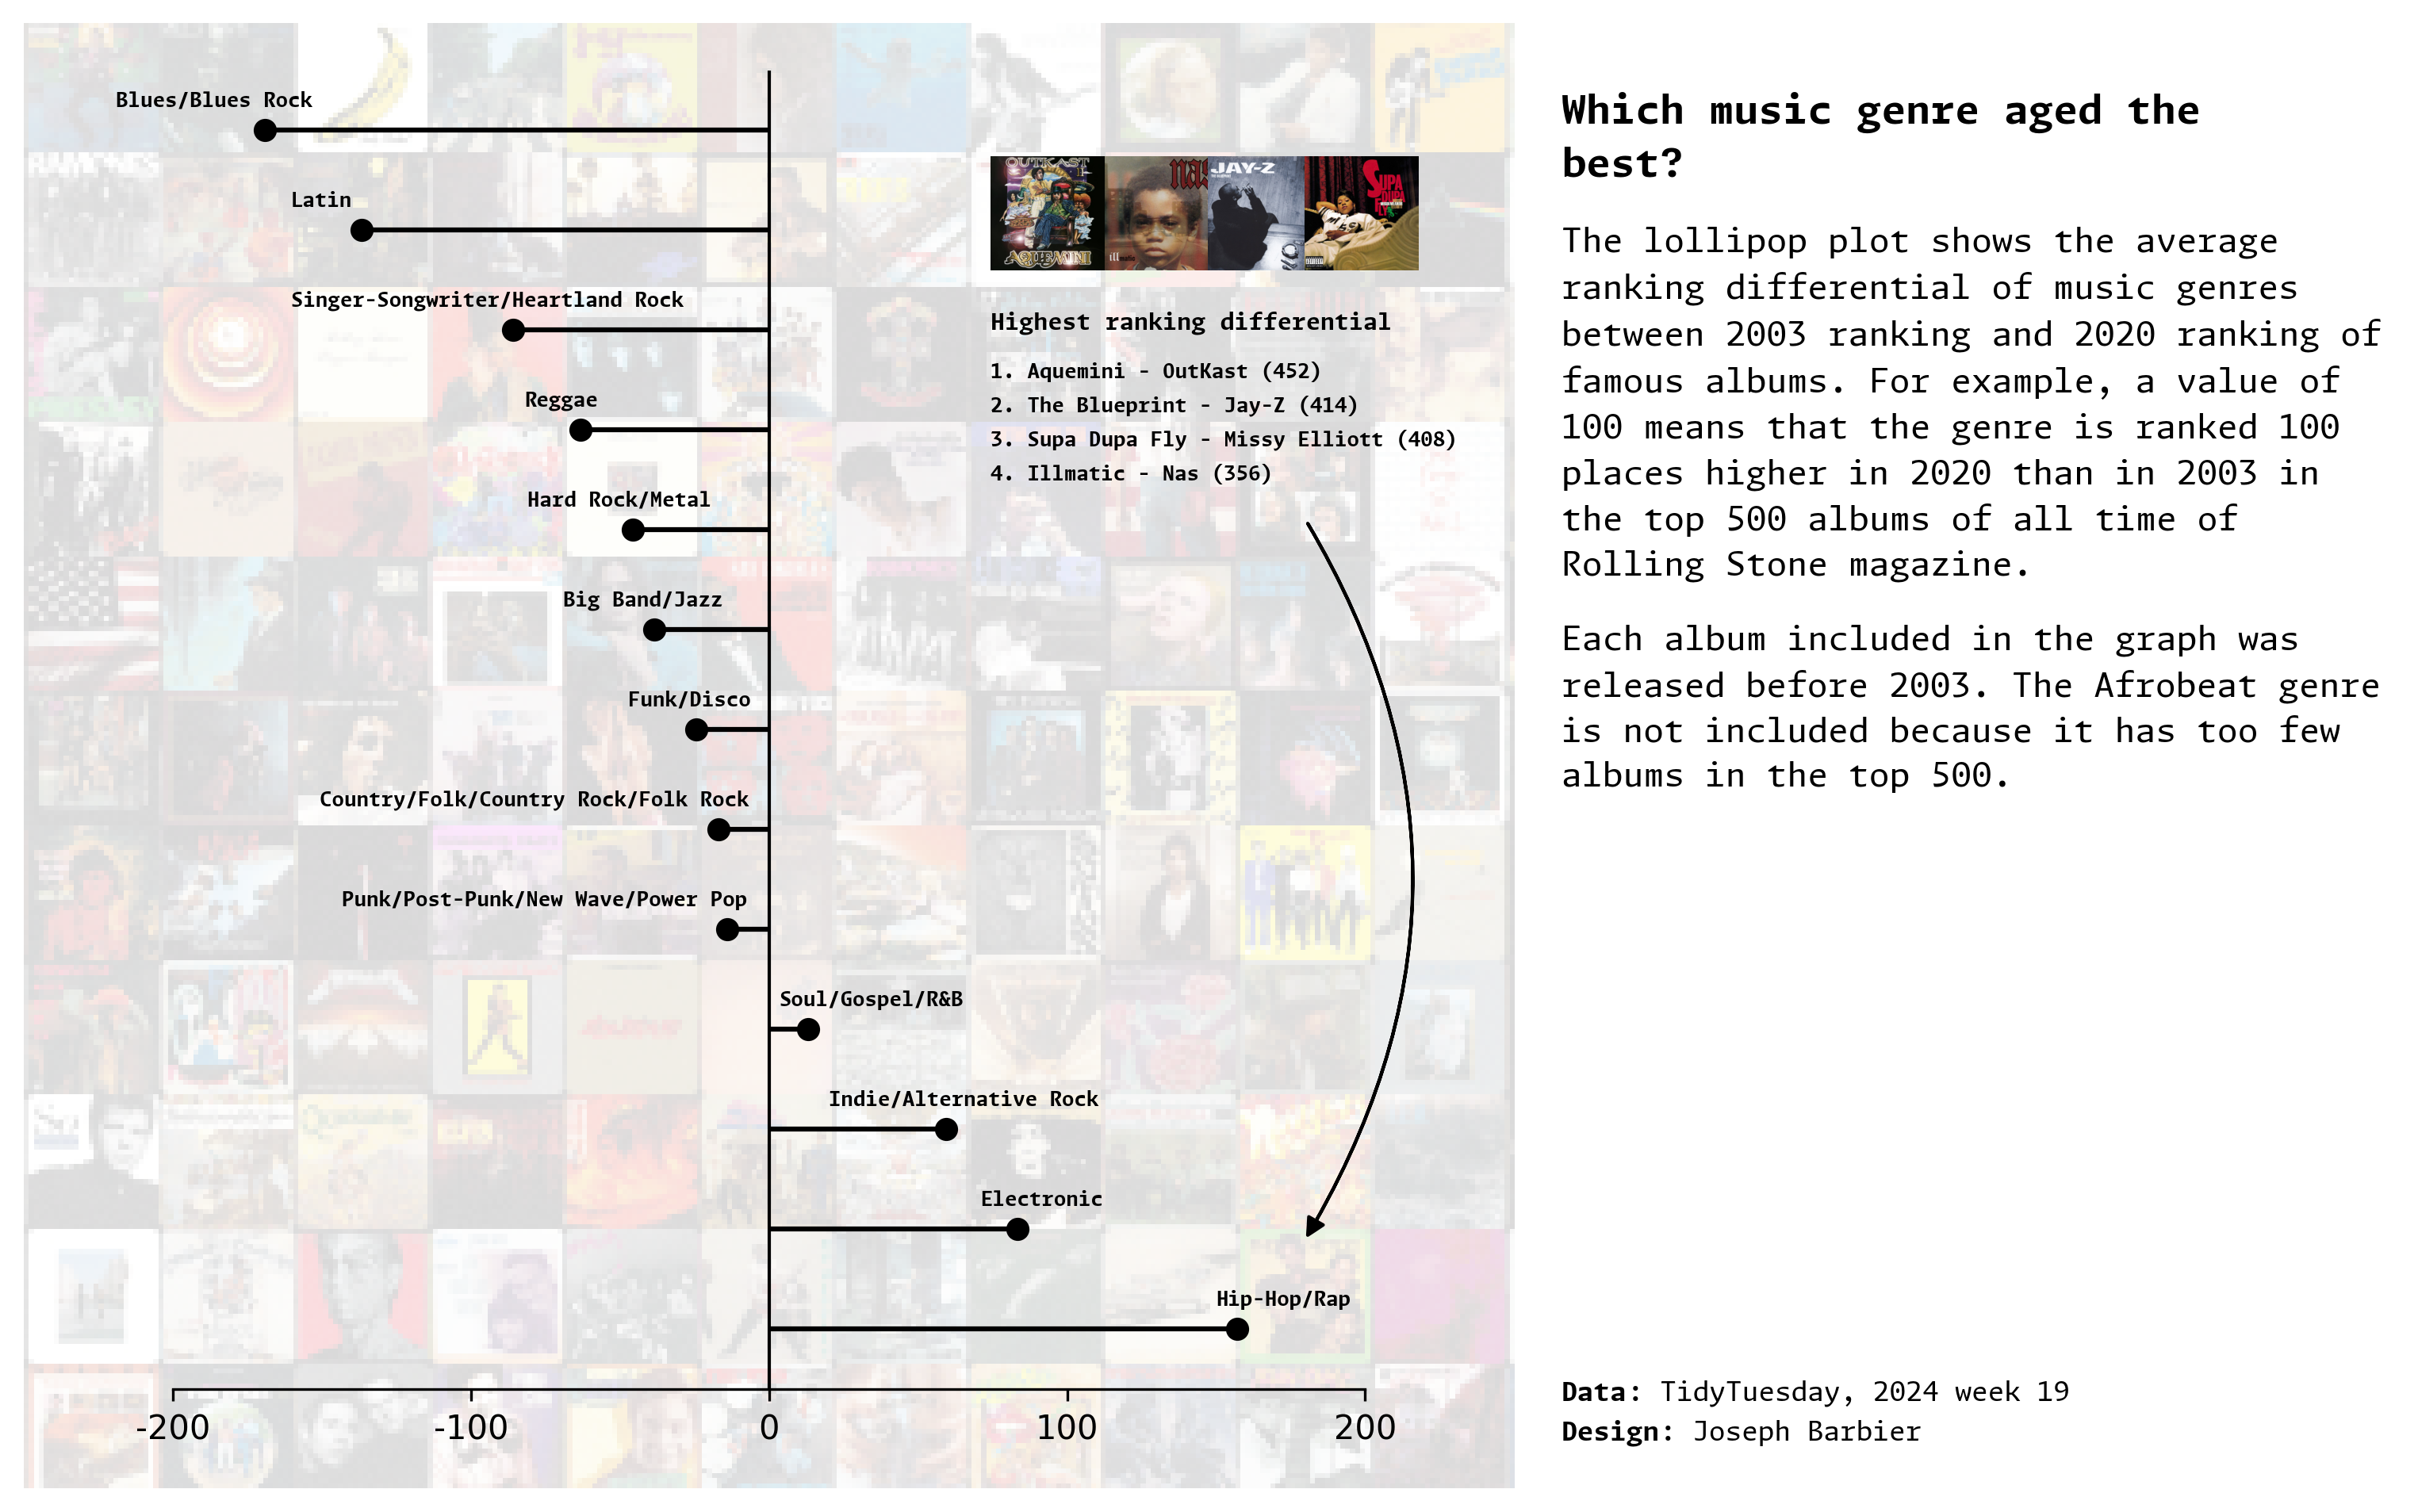

In [4]:
font = load_exact_font(
   font_url="https://github.com/githubnext/monaspace/raw/main/fonts/otf/MonaspaceArgon-Regular.otf"
)
boldfont = load_exact_font(
   font_url="https://github.com/githubnext/monaspace/raw/main/fonts/otf/MonaspaceArgon-Bold.otf"
)

fig, ax = plt.subplots(figsize=(12,8), dpi=300)

ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)
#sub_ax.set_axis_off()
sub_ax.set_xlim(-200, 200)
sub_ax.set_xticks([-200, -100, 0, 100, 200])
sub_ax.set_xticklabels(['-200', '-100', '0', '100', '200'])
sub_ax.set_yticklabels([])
sub_ax.set_yticks([])
sub_ax.spines[['top', 'left', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)

# lollipop plot
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# reference vertical line
sub_ax.axvline(0, color='black', lw=1)

# label of each genre next to the lollipop
for i, row in enumerate(data.itertuples()):
    genre = row.genre
    x = row.diff * 1.1
    y = i + 0.3

    if genre.startswith('Country') or genre.startswith('Punk'):
        x -= 60
    if genre.startswith('Soul'):
        x += 20
    ax_text(
        x, y,
        genre,
        fontsize=6, fontweight='bold',
        va='center', ha='center',
        color='black',
        zorder=3,
        font=boldfont,
        ax=sub_ax
    )

# add images
ax_image1 = fig.add_axes([0.58, 0.75, 0.06, 0.06], zorder=4)
ax_image1.imshow(image_rap1)  # display
ax_image1.set_axis_off()  # remove axis

ax_image2 = fig.add_axes([0.62, 0.75, 0.06, 0.06], zorder=4)
ax_image2.imshow(image_rap2)  # display
ax_image2.set_axis_off()  # remove axis

ax_image3 = fig.add_axes([0.655, 0.75, 0.06, 0.06], zorder=4)
ax_image3.imshow(image_rap3)  # display
ax_image3.set_axis_off()  # remove axis

ax_image4 = fig.add_axes([0.69, 0.75, 0.06, 0.06], zorder=4)
ax_image4.imshow(image_rap4)  # display
ax_image4.set_axis_off()  # remove axis

# annotation with images
text = """<Highest ranking differential>\n
1. Aquemini - OutKast (452)
2. The Blueprint - Jay-Z (414)
3. Supa Dupa Fly - Missy Elliott (408)
4. Illmatic - Nas (356)
"""
fig_text(
    0.59, 0.68,
    text,
    fontsize=6,
    va='center', ha='left',
    color='black',
    font=boldfont,
    highlight_textprops=[
        {'fontsize': 7}
    ]
)

# credit
text = """
<Data>: TidyTuesday, 2024 week 19
<Design>: Joseph Barbier
"""
fig_text(
    0.79, 0.15,
    text, color='black',
    fontsize=8,
    font=font,
    va='center', ha='left',
    highlight_textprops=[
        {"font": boldfont},
        {"font": boldfont}
    ],
)

# title
text = "Which music genre aged the best?"
text = textwrap.fill(text, width=30)
fig_text(
    0.79, 0.82,
    text,
    fontsize=12,
    va='center', ha='left',
    font=boldfont
)

# description1
text = """The lollipop plot shows the average
ranking differential of music genres
between 2003 ranking and 2020 ranking
of famous albums.
For example, a value of 100 means
that the genre is ranked 100 places
higher in 2020 than in 2003 in the
top 500 albums of all time of Rolling
Stone magazine.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.68,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
    font=font
)

# description2
text = """Each album included in the graph
was released before 2003. The Afrobeat
genre is not included because it has too
few albums in the top 500.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.52,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
    font=font
)

# arrows
draw_arrow(fig, (0.7, 0.62), (0.7, 0.24), invert=True, radius=0.3)

plt.savefig('lollipop.png', dpi=300, bbox_inches='tight')
plt.show()